#Data Source : https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

Analyze data and Recommend solutions to increase sales Revenue 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv('supermarket_sales.csv')

In [6]:
df.head(5)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [36]:
# summary of the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [37]:
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

# Display duplicate rows if any
if duplicates.sum() > 0:
    print("Duplicate rows:")
    print(df[duplicates])
else:
    print("No duplicate rows found.")

Number of duplicate rows: 0
No duplicate rows found.


In [8]:
# Check for missing values
print(df.isnull().sum())

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [9]:
# Summary statistics for numerical columns
print(df.describe())

        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875   

In [38]:
####Data Cleaning 

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert 'Time' to datetime.time
df['Time'] = pd.to_datetime(df['Time']).dt.time

# Verify changes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

C:\Users\Hello\AppData\Local\Temp\ipykernel_2588\2516509419.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time']).dt.time


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

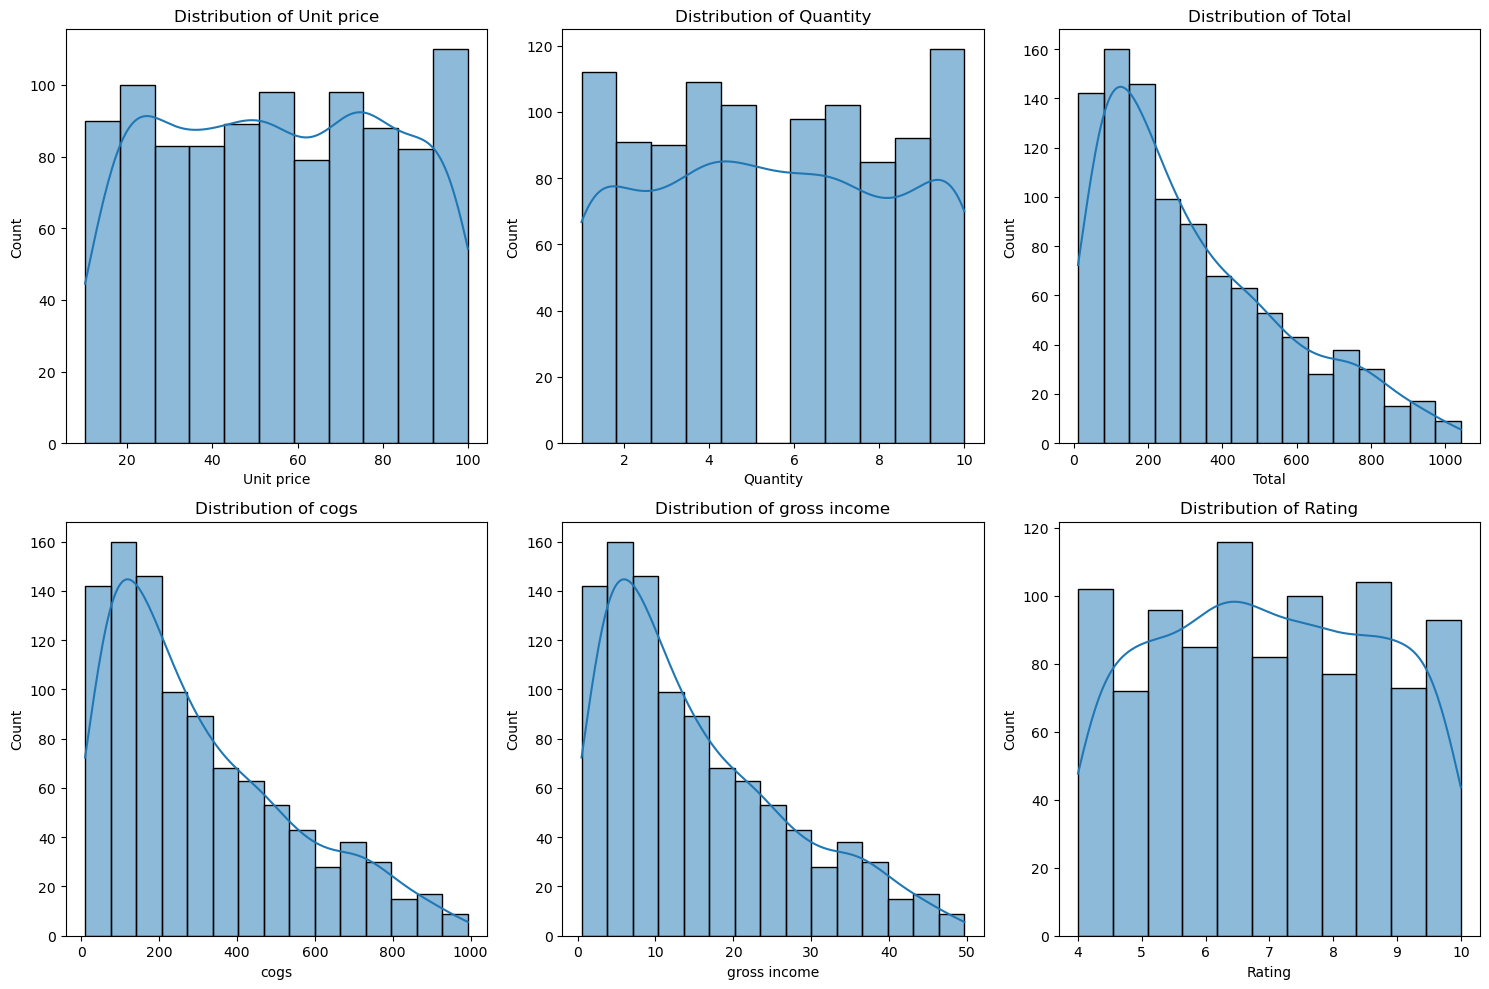

In [57]:
# Plot distribution of numerical variables
numerical_cols = ['Unit price', 'Quantity', 'Total', 'cogs', 'gross income', 'Rating']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

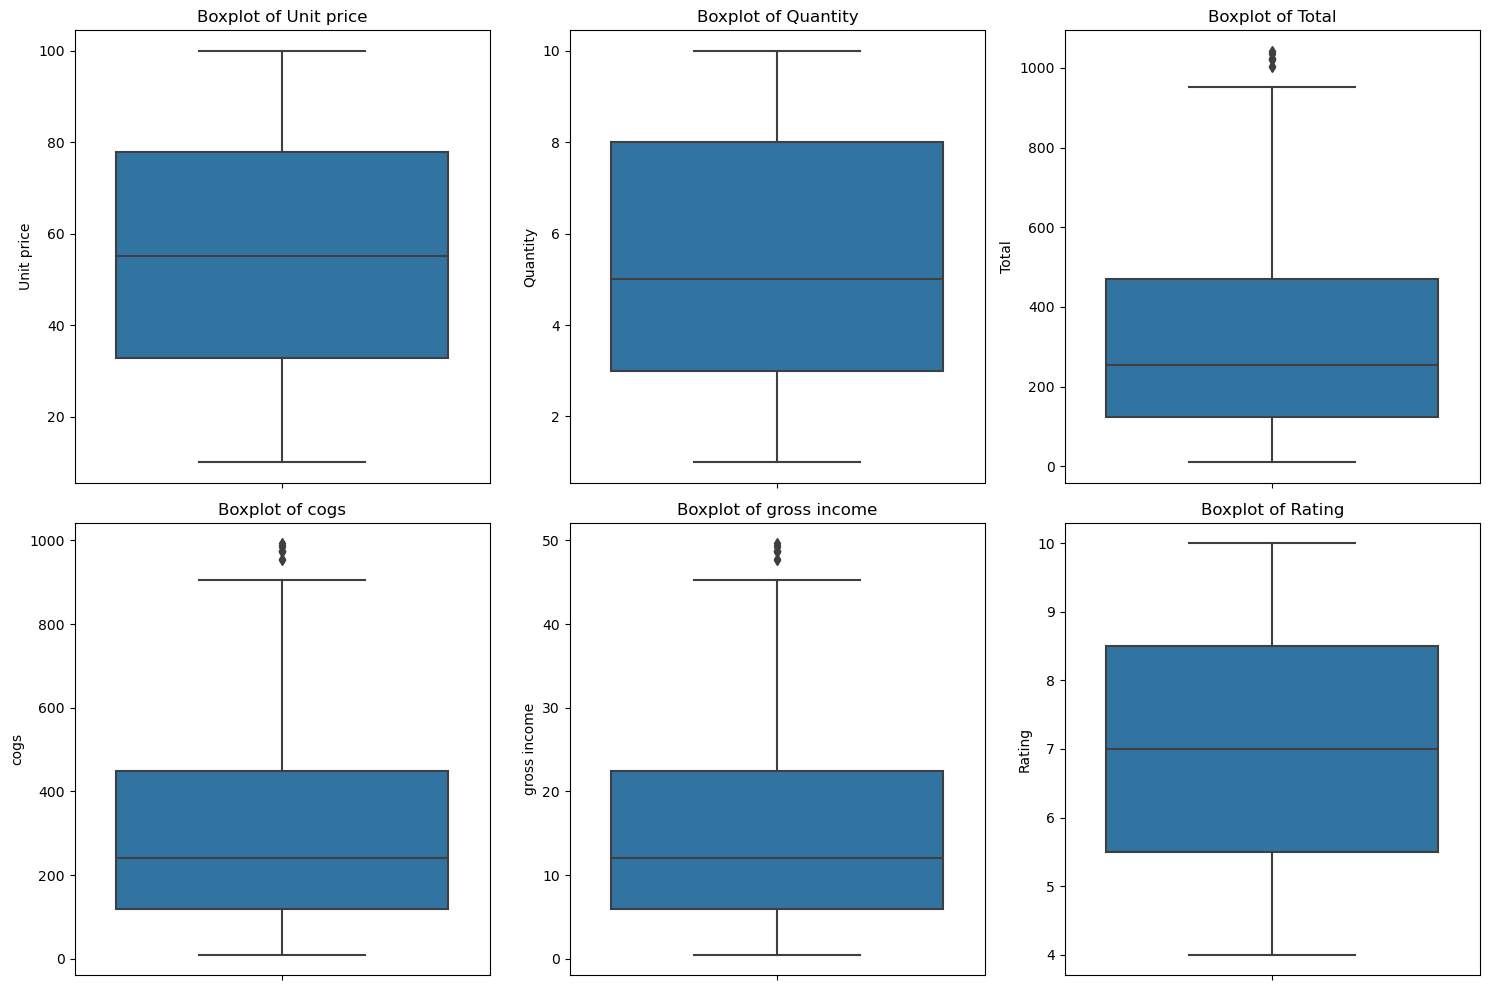

In [58]:
# Boxplots to Identify Outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

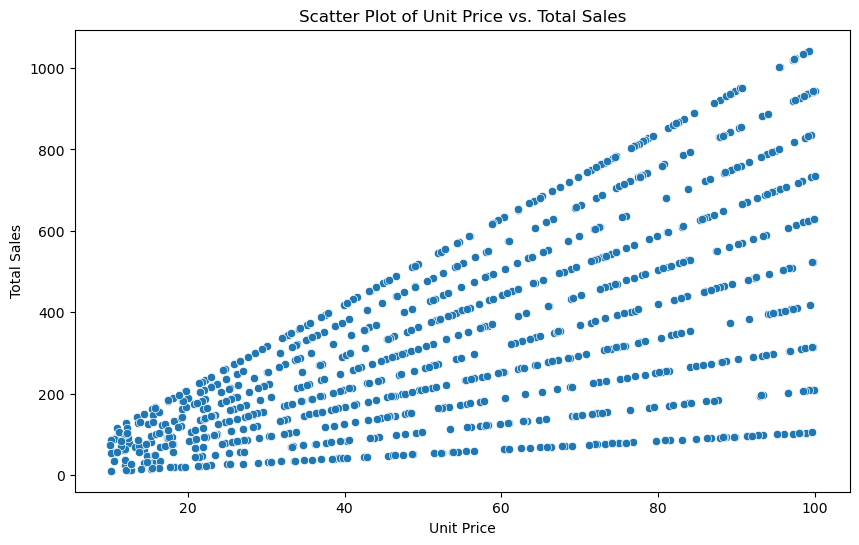

In [64]:
# Scatter plot between Unit price and Total sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unit price', y='Total', data=df)
plt.title('Scatter Plot of Unit Price vs. Total Sales')
plt.xlabel('Unit Price')
plt.ylabel('Total Sales')
plt.show()

C:\Users\Hello\AppData\Local\Temp\ipykernel_2588\4049432903.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product line', y='Total', data=df, estimator=sum, ci=None)


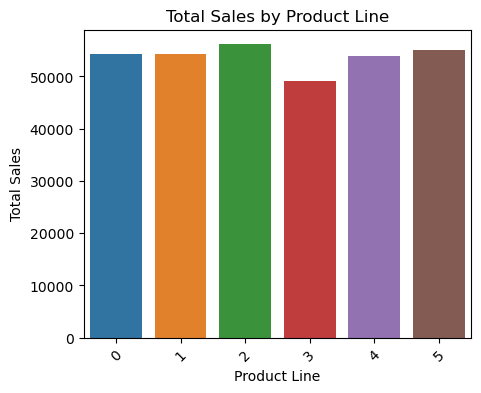

In [75]:
# Bar plot for total sales by product line
plt.figure(figsize=(5, 4))
sns.barplot(x='Product line', y='Total', data=df, estimator=sum, ci=None)
plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

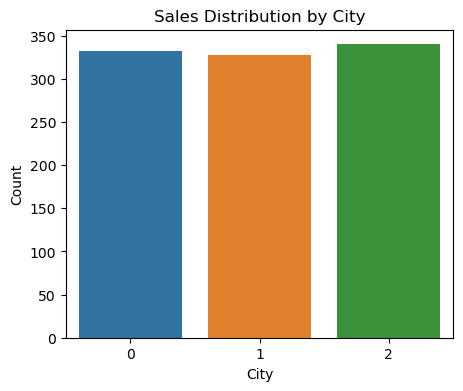

In [76]:
# Bar plot for sales distribution by city
plt.figure(figsize=(5, 4))
sns.countplot(x='City', data=df)
plt.title('Sales Distribution by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

In [77]:
numeric_data = df.drop(columns=['Invoice ID', 'Date', 'Time'])

In [78]:
# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

In [50]:
# Print the correlation matrix
print(correlation_matrix)

                           Branch      City  Customer type    Gender  \
Branch                   1.000000 -0.507401      -0.019608 -0.056318   
City                    -0.507401  1.000000       0.004899  0.012219   
Customer type           -0.019608  0.004899       1.000000  0.039996   
Gender                  -0.056318  0.012219       0.039996  1.000000   
Product line            -0.053938  0.008811      -0.036800  0.005193   
Unit price               0.028202 -0.013763      -0.020238  0.015445   
Quantity                 0.015964 -0.002121      -0.016763 -0.074258   
Tax 5%                   0.041047 -0.012812      -0.019670 -0.049451   
Total                    0.041047 -0.012812      -0.019670 -0.049451   
Payment                 -0.050104  0.019094       0.018073  0.044578   
cogs                     0.041047 -0.012812      -0.019670 -0.049451   
gross margin percentage       NaN       NaN            NaN       NaN   
gross income             0.041047 -0.012812      -0.019670 -0.04

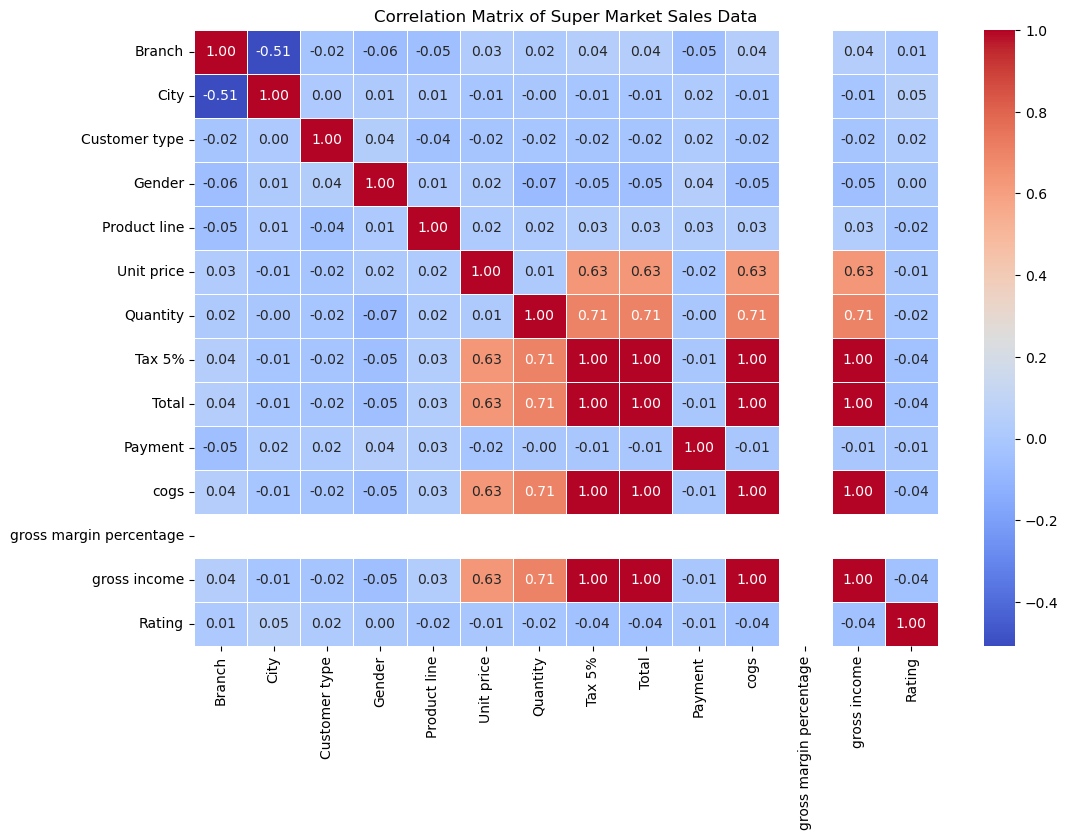

In [79]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Super Market Sales Data')
plt.show()

## Interpretation of correlation Matrix

1. Positive Correlations:

1.1. Unit price vs. Total: The correlation coefficient is 0.63, indicating a strong positive correlation. This means that as the unit price increases, the total sales value also increases significantly.

1.2. Quantity vs. Total: The correlation coefficient is 0.71, suggesting a strong positive correlation. Higher quantities sold directly contribute to higher total sales.

1.3. Quantity vs. cogs: The correlation coefficient is 0.71, indicating a strong positive correlation. More quantities sold lead to higher cost of goods sold (cogs).

1.4. Total vs. cogs: The correlation coefficient is 1.0, showing a perfect positive correlation. This makes sense because the total sales value directly includes the cogs.

1.5. Unit price vs. Tax 5%: The correlation coefficient is 0.63, indicating a moderate positive correlation. Higher unit prices lead to higher tax amounts since tax is calculated as a percentage of the unit price.

1.6. Quantity vs. Tax 5%: The correlation coefficient is 0.71, suggesting that increased quantity sold also increases the tax amount.

2. Weak or No Correlations:

2.1. Branch, City, Customer type, Gender, Product line, Payment vs. other variables: These variables show very low correlation coefficients with other variables, indicating weak or no linear relationship.

2.2. Rating vs. other variables: The Rating variable has a very low correlation with different variables, suggesting that it does not have a significant linear relationship with the sales metrics.


## Recommendation to Increase the revenue

1. Focus on High-Value Products:

Since there is a strong positive correlation between unit price and total sales, promoting and expanding the range of premium products can drive higher revenue.

2. Boost Sales Volume:

Increasing the quantity sold of popular items can significantly impact total revenue. Consider volume discounts or bundle offers to encourage higher purchase quantities.

3. Pricing Strategies:

As both unit price and quantity sold have strong correlations with tax amounts and total sales, optimizing pricing strategies to balance high unit prices and high sales volumes can maximize revenue.

4. Analyze Product Line Performance:

Although the Product line variable shows weak correlation with total sales, a more granular analysis may reveal specific product lines that contribute more to sales. Focus marketing efforts on these product lines.

5. Enhance Payment Method Options:

Even though Payment shows weak correlation with total sales, ensuring that all popular payment methods are available can remove barriers to purchase, potentially increasing sales.

6. Leverage Customer Data:

While Customer type and other demographic factors show weak correlations, personalized marketing and loyalty programs targeting specific customer segments (e.g., members) can increase customer retention and sales.

7. Improve Customer Experience and Ratings:

Though Ratings do not show a strong correlation with sales, improving product quality and customer satisfaction can lead to better ratings. Positive ratings can attract more customers through word-of-mouth and online reviews.